<a href="https://colab.research.google.com/github/maycmesquia/analise_ENEM_2019/blob/main/Enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise do Enem 2019
Pequena analise do ENEM ano 2019

## Preparando o ambiente para execução
Importando blibiotecas necessarias e abrindo arquivo para criação do DataFrame: **df_microDados**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

## Preparando o arquivo:
Como o arquivo do ENEM 2019 é razoavelmente grande optei por importar somente as colunas que irei utilizar, sabendo que a cada analise as colunas que precisaria seriam diferentes criei uma função "data" que recebe uma lista com as colunas que desejo utilisar na analise, e a função me retorna o Dataframe que será utilisado na analise, assim economizando memoria.

In [4]:
def data(colunas):
    arquivo = '/content/drive/MyDrive/Colab Notebooks/Outros pessoais/ENEM/MICRODADOS_ENEM_2019.csv'
    return pd.read_csv(arquivo, sep=';', encoding='ISO-8859-1', usecols=colunas)

## Quantidade de inscritos por estado

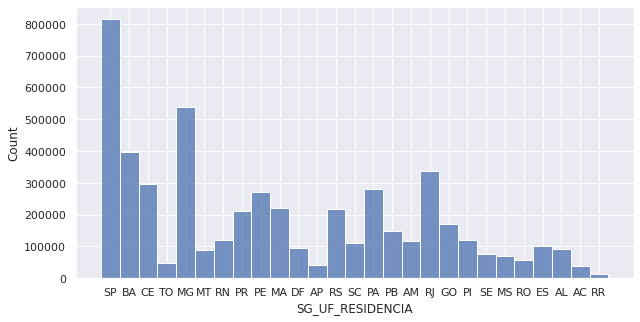

In [9]:
colunas = ['SG_UF_RESIDENCIA']

df_enem = data(colunas)

f, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df_enem, x='SG_UF_RESIDENCIA')

Tabela de distribuição de Frequencia

In [ ]:
fi = df_enem.value_counts()
fp = df_enem.value_counts(normalize = True ) * 100
tabela_frequencia = pd.DataFrame({ 'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp }).rename_axis('UF')

tabela_frequencia

,Frequência Absoluta,Frequência Percentual (%)
UF,,
SP,813772,15.971126
MG,538896,10.576397
BA,398095,7.813031
RJ,338710,6.647538
CE,295870,5.806758
PA,281518,5.525085
PE,271727,5.332926
MA,219673,4.311312
RS,218763,4.293453


## Situação socio-economica dos faltantes ou desistentes
No questionario socio-economico do ENEM é informado a média da renda familiar, com isso verifiquei onde se concentram a maior parte dos desistentes e faltantes.

Já que o ENEM é a unica forma de ingressar nas universidades publicas federais, e é atraves dele tambem que é realizado a analise para o financiamento estudantil nas faculdades e universidades privadas, os estudantes que faltaram ao certame ficaram impedidos de usufruirem do das duas modalidades para ingresso em curso superior.


In [17]:
colunas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q006']

df_enem = data(colunas)

df_enem.head()

,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q001,Q002,Q006
0,0,0,0,0,0,B,B,A
1,0,0,0,0,0,C,E,C
2,0,0,0,0,0,E,E,B
3,0,1,1,1,1,C,E,E
4,0,1,1,1,1,E,E,G


In [23]:
df_enem = df_enem[df_enem['IN_TREINEIRO']==0]

df_enem = df_enem[  (df_enem['TP_PRESENCA_CN']==0) | 
                    (df_enem['TP_PRESENCA_CH']==0) |
                    (df_enem['TP_PRESENCA_LC']==0) |
                    (df_enem['TP_PRESENCA_MT']==0)  ]

rendas={
        'A':	'Nenhuma renda.',
        'B':	'Até R$ 998,00.',
        'C':	'De R$ 998,01 até R$ 1.497,00.',
        'D':	'De R$ 1.497,01 até R$ 1.996,00.',
        'E':	'De R$ 1.996,01 até R$ 2.495,00.',
        'F':	'De R$ 2.495,01 até R$ 2.994,00.',
        'G':	'De R$ 2.994,01 até R$ 3.992,00.',
        'H':	'De R$ 3.992,01 até R$ 4.990,00.',
        'I':	'Maior que R$ 4.990,01',
        'J':	'Maior que R$ 4.990,01',
        'K':	'Maior que R$ 4.990,01',
        'L':	'Maior que R$ 4.990,01',
        'M':	'Maior que R$ 4.990,01',
        'N':	'Maior que R$ 4.990,01',
        'O':	'Maior que R$ 4.990,01',
        'P':	'Maior que R$ 4.990,01',
        'Q':	'Maior que R$ 4.990,01'
        }

df_enem['Renda'] = df_enem['Q006'].map(rendas)
df_enem.head()

,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q001,Q002,Q006,Renda
0,0,0,0,0,0,B,B,A,Nenhuma renda.
1,0,0,0,0,0,C,E,C,"De R$ 998,01 até R$ 1.497,00."
2,0,0,0,0,0,E,E,B,"Até R$ 998,00."
7,0,0,0,0,0,E,B,D,"De R$ 1.497,01 até R$ 1.996,00."
8,0,0,0,0,0,B,C,C,"De R$ 998,01 até R$ 1.497,00."


In [24]:
fi = df_enem['Renda'].value_counts()
fp = df_enem['Renda'].value_counts(normalize = True ) * 100
tabela_frequencia = pd.DataFrame({ 'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp }).rename_axis('Faixa de Renda')

tabela_frequencia

,Frequência Absoluta,Frequência Percentual (%)
Faixa de Renda,,
"De R$ 998,01 até R$ 1.497,00.",388546,29.833856
"Até R$ 998,00.",357222,27.428695
"De R$ 1.497,01 até R$ 1.996,00.",135670,10.417195
"De R$ 1.996,01 até R$ 2.495,00.",123186,9.458631
"Maior que R$ 4.990,01",82283,6.317963
Nenhuma renda.,68653,5.271406
"De R$ 2.994,01 até R$ 3.992,00.",62808,4.822607
"De R$ 2.495,01 até R$ 2.994,00.",50102,3.846998
"De R$ 3.992,01 até R$ 4.990,00.",33896,2.602648


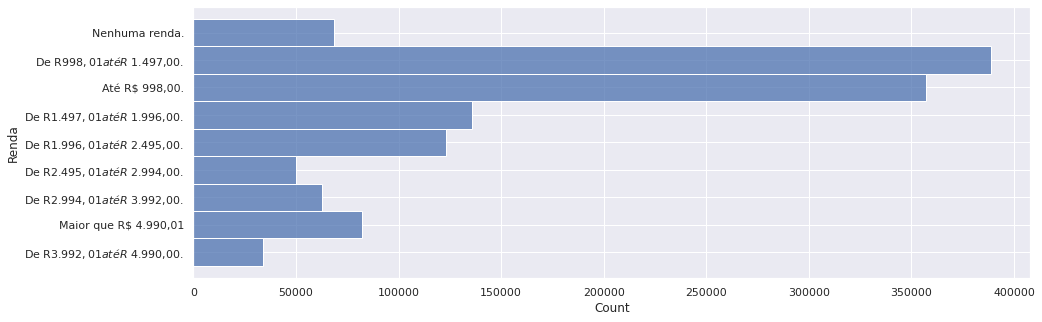

In [29]:
f, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data=df_enem, y='Renda')

## Nivel de estudo dos Pais

In [33]:
formacao = {
    'A':	'Nunca estudou.',
    'B':	'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':	'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':	'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':	'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':	'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':	'Completou a Pós-graduação.',
    'H':	'Não sei.',
            }

df_enem['Formacao Pai'] = df_enem['Q001'].map(formacao)
df_enem['Formacao Mãe'] = df_enem['Q002'].map(formacao)

df_enem.head(2)

,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q001,Q002,Q006,Renda,Formacao Pai,Formacao Mãe
0,0,0,0,0,0,B,B,A,Nenhuma renda.,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
1,0,0,0,0,0,C,E,C,"De R$ 998,01 até R$ 1.497,00.","Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."


In [36]:
fi_pai = df_enem['Formacao Pai'].value_counts()
fp_pai = df_enem['Formacao Pai'].value_counts(normalize = True ) * 100
fi_mae = df_enem['Formacao Mãe'].value_counts()
fp_mae = df_enem['Formacao Mãe'].value_counts(normalize = True ) * 100
dicionario = {'Pai Frequência Absoluta': fi_pai, 'Pai Frequência Percentual (%)': fp_pai, 
              'Mãe Frequência Absoluta': fi_mae, 'Mãe Frequência Percentual (%)': fp_mae }
tabela_frequencia = pd.DataFrame(dicionario).rename_axis('Formação')

tabela_frequencia

,Pai Frequência Absoluta,Pai Frequência Percentual (%),Mãe Frequência Absoluta,Mãe Frequência Percentual (%)
Formação,,,,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",195439,15.006457,203807,15.648980
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",142399,10.933870,179706,13.798425
"Completou a Faculdade, mas não completou a Pós-graduação.",58204,4.469097,85157,6.538638
Completou a Pós-graduação.,28048,2.153619,55210,4.239208
"Completou o Ensino Médio, mas não completou a Faculdade.",277758,21.327185,368121,28.265557
Nunca estudou.,100790,7.738992,71572,5.495537
Não completou a 4ª série/5º ano do Ensino Fundamental.,368944,28.328749,293723,22.553030
Não sei.,130784,10.042031,45070,3.460625


In [34]:
fi = df_enem['Formacao Pai'].value_counts()
fp = df_enem['Formacao Pai'].value_counts(normalize = True ) * 100
tabela_frequencia = pd.DataFrame({ 'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp }).rename_axis('Formação Pai')

tabela_frequencia

,Frequência Absoluta,Frequência Percentual (%)
Formação Pai,,
Não completou a 4ª série/5º ano do Ensino Fundamental.,368944,28.328749
"Completou o Ensino Médio, mas não completou a Faculdade.",277758,21.327185
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",195439,15.006457
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",142399,10.933870
Não sei.,130784,10.042031
Nunca estudou.,100790,7.738992
"Completou a Faculdade, mas não completou a Pós-graduação.",58204,4.469097
Completou a Pós-graduação.,28048,2.153619


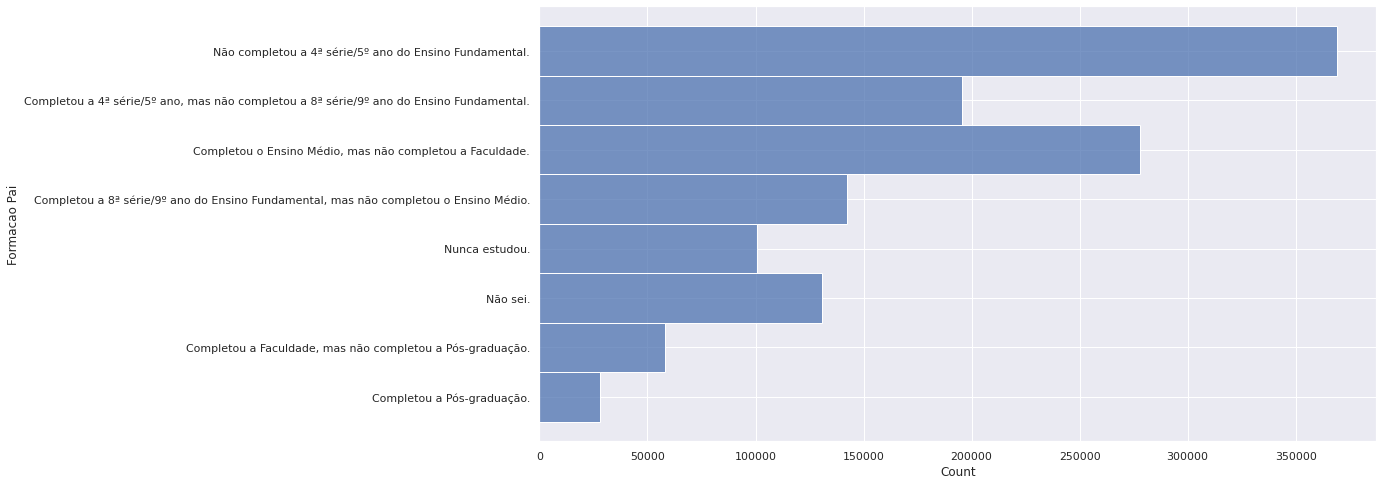

In [38]:
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df_enem, y='Formacao Pai')

In [35]:
fi = df_enem['Formacao Mãe'].value_counts()
fp = df_enem['Formacao Mãe'].value_counts(normalize = True ) * 100
tabela_frequencia = pd.DataFrame({ 'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp }).rename_axis('Formação Mãe')

tabela_frequencia

,Frequência Absoluta,Frequência Percentual (%)
Formação Mãe,,
"Completou o Ensino Médio, mas não completou a Faculdade.",368121,28.265557
Não completou a 4ª série/5º ano do Ensino Fundamental.,293723,22.553030
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",203807,15.648980
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",179706,13.798425
"Completou a Faculdade, mas não completou a Pós-graduação.",85157,6.538638
Nunca estudou.,71572,5.495537
Completou a Pós-graduação.,55210,4.239208
Não sei.,45070,3.460625


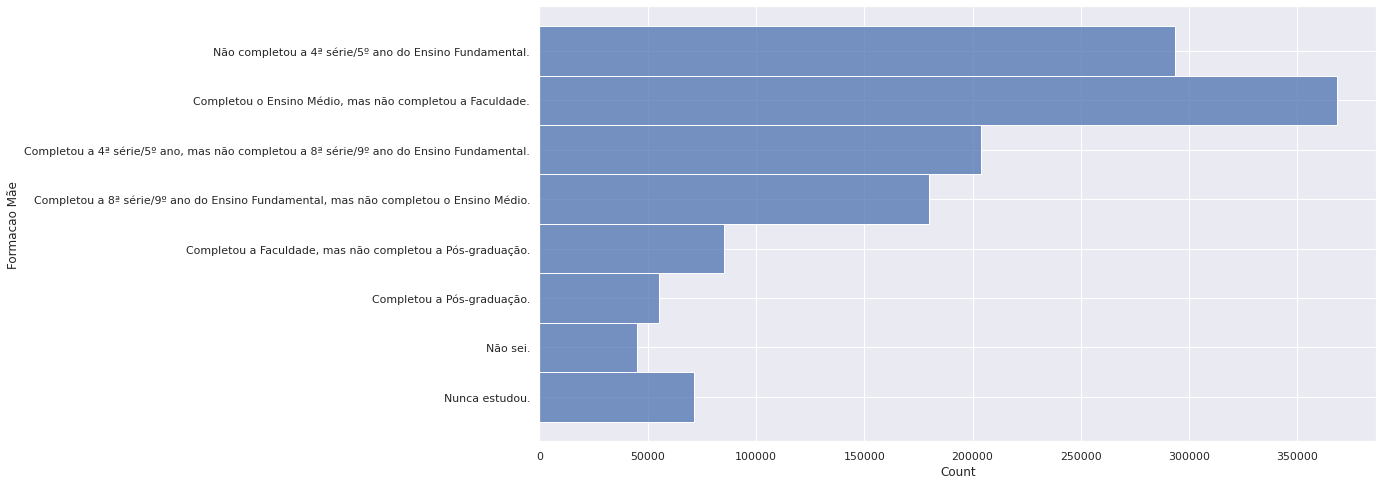

In [40]:
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df_enem, y='Formacao Mãe')

## Média das notas por estado

Para calcular a média irei limpar o arquivo original, retirando os dados dos alunos que faltaram a qualquer dia das provas!

In [5]:
colunas = ['SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

df_enem = data(colunas)

df_enem.dropna(inplace=True)

df_enem.head()

,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,TO,483.8,503.6,537.3,392.0,460.0
4,MG,513.6,575.5,570.7,677.0,860.0
5,MT,563.7,644.9,564.2,675.3,800.0
6,BA,484.6,488.4,507.2,594.7,600.0
9,SP,543.9,548.1,502.5,480.7,400.0


In [6]:
df_enem.groupby(df_enem['SG_UF_RESIDENCIA']).mean()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
SG_UF_RESIDENCIA,,,,,
AC,451.294472,484.351885,502.476048,482.317075,542.830502
AL,458.569308,487.526477,504.266797,499.715334,563.636073
AM,450.938595,483.962409,501.494576,481.310410,518.494482
AP,450.283653,484.988238,497.959238,473.546799,539.660937
BA,464.807153,495.605644,510.575997,500.711314,564.112658
CE,468.400073,499.779729,513.408840,517.718759,573.336908
DF,492.901929,526.874065,537.907498,536.908191,595.212640
ES,489.001245,520.752270,529.303432,541.781087,596.789465
GO,478.290006,508.767239,522.541761,523.400301,585.617801


Calculando a média nacional por area do Enem

In [ ]:
df_enem2019[colunas].mean()

NU_NOTA_CN         477.883272
NU_NOTA_CH         509.890593
NU_NOTA_LC         522.396600
NU_NOTA_MT         523.185098
NU_NOTA_REDACAO    579.769406
dtype: float64

In [ ]:
df_graf = df_enem2019.groupby(by=['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'].mean().copy()
#int(df_graf['TP_DEPENDENCIA_ADM_ESC'])
df_graf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,AC,1.0,500.735154,514.979206,528.036215,539.725178,650.233645
1,AC,2.0,442.952998,471.637962,492.519424,477.782951,529.788282
2,AC,3.0,417.300000,464.357143,453.957143,429.316667,431.428571
3,AC,4.0,531.280909,570.809036,560.498494,593.617576,791.445783
4,AL,1.0,510.050164,537.863542,545.193924,580.371550,679.560440
...,...,...,...,...,...,...,...
101,SP,4.0,549.679569,574.826283,572.698506,637.902500,703.742762
102,TO,1.0,510.690057,537.948174,544.355337,563.348295,662.387640
103,TO,2.0,441.506271,465.781507,487.022814,478.708635,533.322519
104,TO,3.0,390.375000,403.925000,433.200000,405.400000,420.000000


In [ ]:
df_graf

,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,AC,1.0,500.735154,514.979206,528.036215,539.725178,650.233645
1,AC,2.0,442.952998,471.637962,492.519424,477.782951,529.788282
2,AC,3.0,417.300000,464.357143,453.957143,429.316667,431.428571
3,AC,4.0,531.280909,570.809036,560.498494,593.617576,791.445783
4,AL,1.0,510.050164,537.863542,545.193924,580.371550,679.560440
...,...,...,...,...,...,...,...
101,SP,4.0,549.679569,574.826283,572.698506,637.902500,703.742762
102,TO,1.0,510.690057,537.948174,544.355337,563.348295,662.387640
103,TO,2.0,441.506271,465.781507,487.022814,478.708635,533.322519
104,TO,3.0,390.375000,403.925000,433.200000,405.400000,420.000000
